#  The dataset is located at openneuro.org and its OpenNeuro Accession Number: ds003685 Files: 5398 Size: 30.52GB

## Installations:
If handling EEG / brain -imaging data for the first time. Create a separate conda environment on your machine and install some specialized modules

### Install mne_bids and mne in one shot:
    conda create --name mne --channel conda-forge mne-bids

### Alternatively,install mne-python first, 
conda create --name=mne --channel=conda-forge mne

details here: https://mne.tools/stable/index.html

mne-python is the most popular open source tool for EEG. It is quite mature, allows for good interactive visualization of brain imaging data including EEG
If using an M1 mac, be mindful of arm64 specific environment; if planning to use built-in GPU for keras / tensorflow DL

### install openneuro.py:
pip install openneuro-py

## Exploring ds03685 dataset with mne_bids

In [1]:
import os
import os.path as op
import openneuro
import mne
import matplotlib.pyplot as plt
%matplotlib inline
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report, inspect_dataset
import pandas as pd
from tqdm import tqdm

In [2]:
# .. note: If the keyword argument include is left out of
#          ``openneuro.download``, the whole dataset will be downloaded.
#          We're just using data from one subject to reduce the time
#          it takes to run the example.

dataset = 'ds003685'
subject = '10'
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

In [ ]:
# Download one subject's data from each dataset
openneuro.download(dataset=dataset, target_dir=bids_root,
                   include=[f'sub-{subject}'])

In [ ]:
print(make_report(bids_root))

In [ ]:
print_dir_tree(bids_root, max_depth=4)

In [3]:
subject = '10'
datatype = 'eeg'
session = 'session1' # change to session2, session3 after done with first one
task = 'music' # change when finished
suffix = 'eeg'
bids_path = BIDSPath(subject=subject,task=task,
                     suffix=suffix, datatype=datatype, root=bids_root)

In [ ]:
print(bids_path.match())

In [4]:
print(bids_path)

/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/eeg/sub-10_task-music_eeg


### Read in the raw data

In [36]:
# get names of the .vhdr files
basenames = []
for i in tqdm(range(0, 8)):
    if bids_path.match()[i].basename[-4:] == 'vhdr':
        basenames.append(bids_path.match()[i])

100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 158.27it/s]


In [7]:
# iterate through all files and create preprocessed dataframes
df = pd.DataFrame()
for basename in tqdm(basenames):
    raw = read_raw_bids(bids_path=basename, verbose=False)
    raw.load_data()
    raw = raw.filter(1,40)
    raw = raw.resample(100, npad="auto") 
    raw_data = raw.get_data()
    df1 = pd.DataFrame(raw_data)
    df = pd.concat([df, df1], sort=True)

  0%|                                                                                                   | 0/3 [00:00<?, ?it/s]

Reading 0 ... 149999  =      0.000 ...   299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)



 33%|██████████████████████████████▎                                                            | 1/3 [00:00<00:01,  1.30it/s]

Reading 0 ... 26977  =      0.000 ...    53.954 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

Reading 0 ... 149999  =      0.000 ...   299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

100%|███████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.35it/s]


In [16]:
print(raw.info['sfreq'])

100.0


In [37]:
basenames

[BIDSPath(
 root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
 datatype: eeg
 basename: sub-10_ses-session1_task-music_run-5_eeg.vhdr),
 BIDSPath(
 root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
 datatype: eeg
 basename: sub-10_ses-session2_task-music_run-5_eeg.vhdr),
 BIDSPath(
 root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
 datatype: eeg
 basename: sub-10_ses-session3_task-music_run-5_eeg.vhdr)]

In [128]:
df.shape

(183, 30000)

In [25]:
df_ses2 = df.iloc[61:122, :]

In [8]:
print(raw.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 line_freq: 50.0
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 100.0 Hz
 subject_info: 242 items (dict)
>


Opening raw-browser...


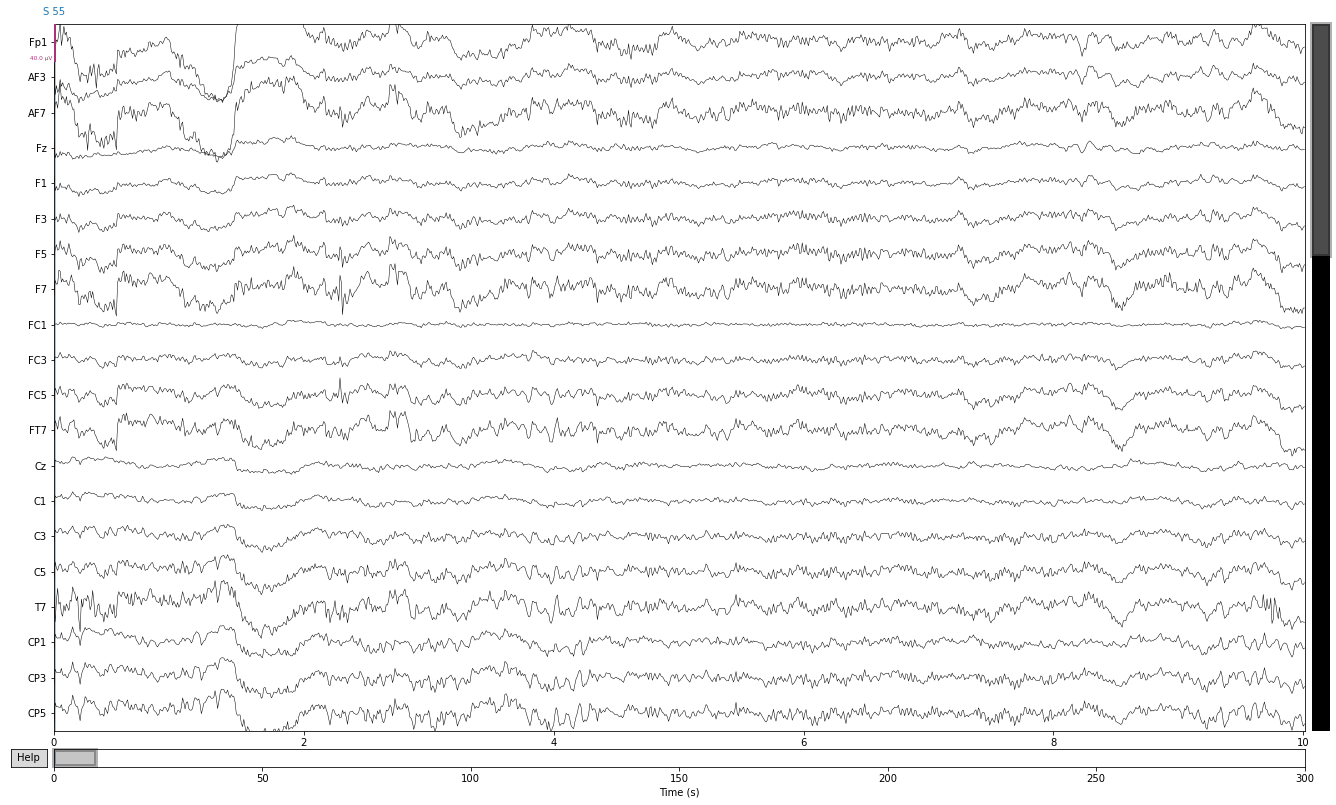

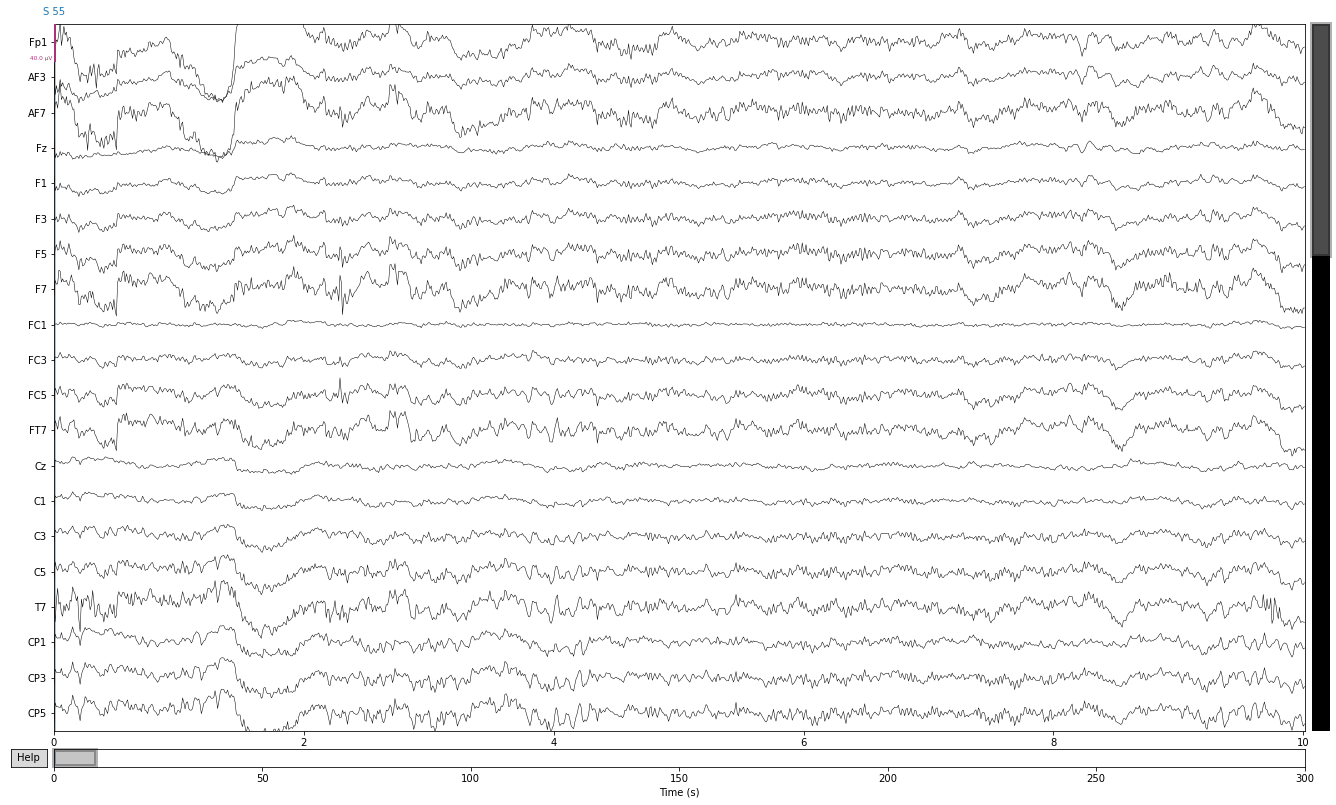

In [17]:
raw.plot()

In [28]:
df_ses1.info

<bound method DataFrame.info of            0             1             2             3             4      \
0   1.677715e-06 -2.233771e-06 -8.420980e-06 -9.025017e-06 -9.912203e-06   
1  -2.479740e-08 -3.423544e-08 -1.185354e-06  1.628797e-07  4.621316e-07   
2   2.642375e-06 -3.404810e-06 -1.012493e-05 -9.529474e-06 -8.525123e-06   
3   7.571869e-08 -5.113210e-09  2.267593e-06  2.471732e-06  1.386157e-06   
4   6.430750e-07 -7.403078e-07  6.961691e-08  4.669716e-07 -4.264953e-07   
..           ...           ...           ...           ...           ...   
56 -2.245477e-06  3.274144e-06  1.375898e-05 -1.729593e-06 -3.363596e-06   
57 -6.856314e-06  8.301529e-06  1.133368e-05  7.751577e-06  1.233338e-05   
58 -3.295214e-06  4.171158e-06  8.800113e-06  3.769206e-06  6.360857e-06   
59 -1.313313e-06  2.372123e-06  1.736044e-05  5.124029e-07 -6.128667e-07   
60 -5.480873e-06  6.974618e-06  1.496597e-05  5.073434e-06  1.096590e-05   

           5         6         7         8         9   

In [134]:
import pyarrow.feather as feather

In [136]:
# save dataframe as a feather file to import into R
feather.write_feather(df_ses1, 'sub10_ses1_music.feather')